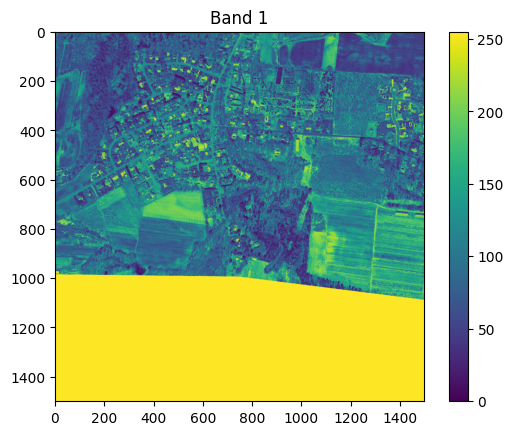

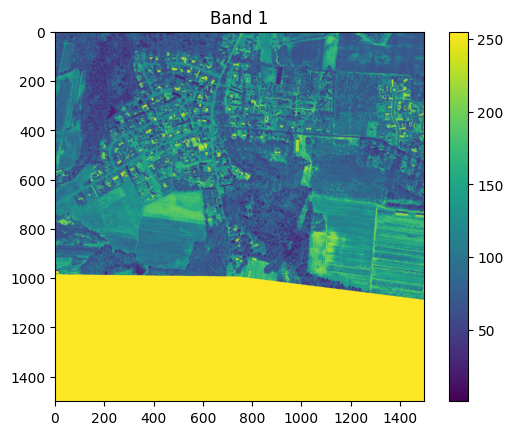

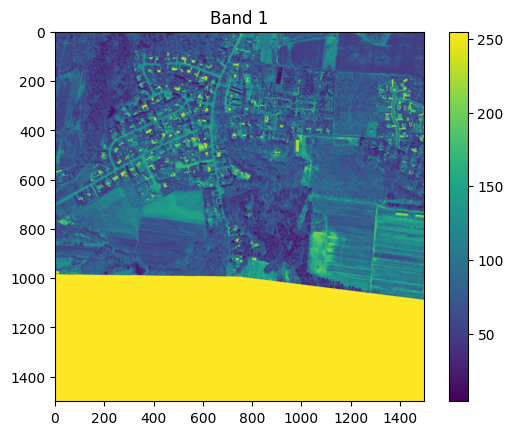

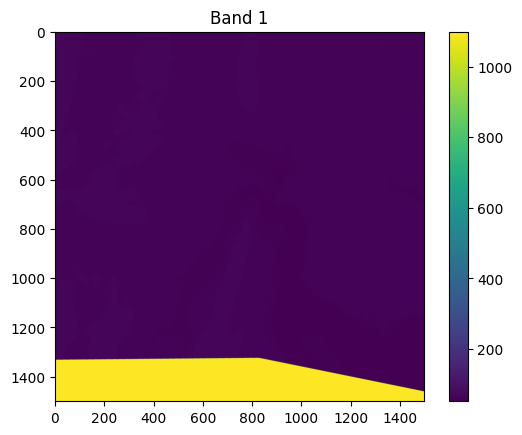

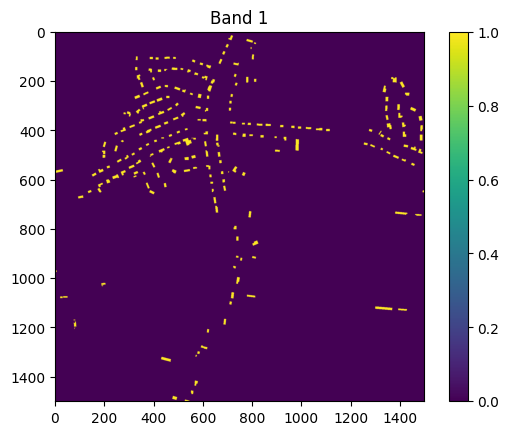

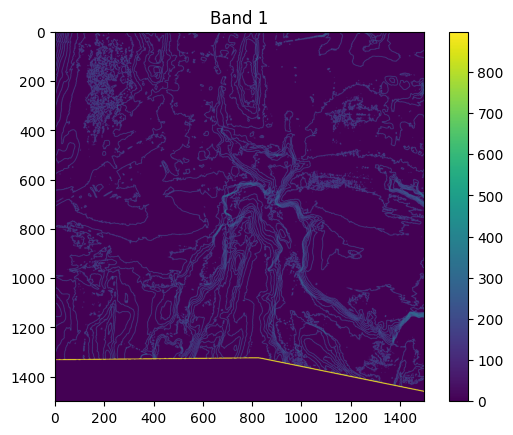

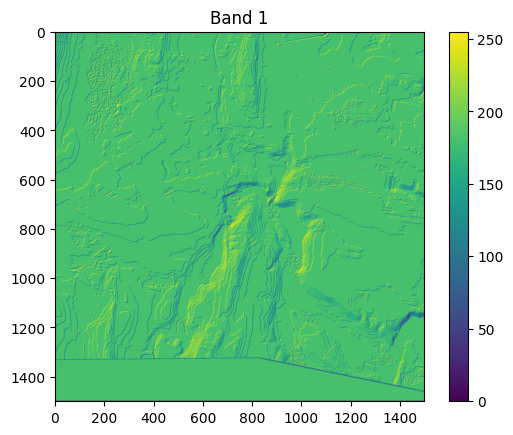

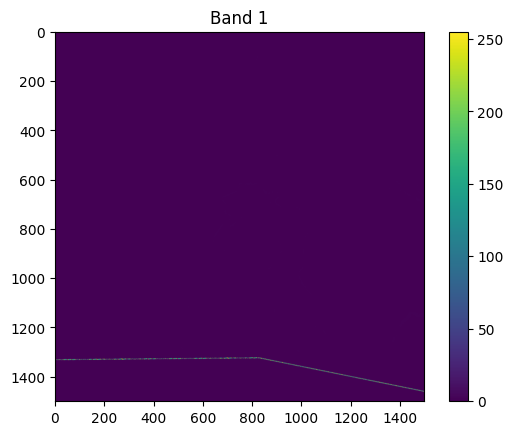

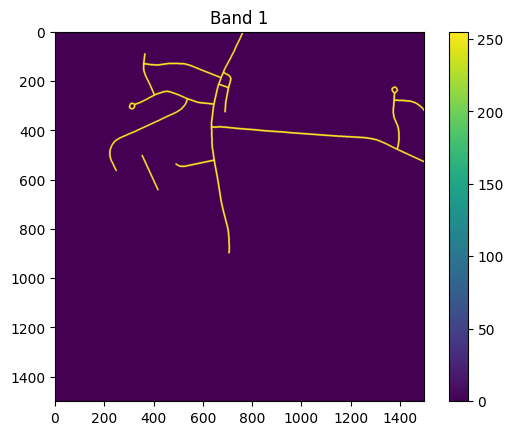

In [9]:
import tifffile


arr = tifffile.imread("./data/tiffs/10078660_15.tiff")

import tifffile
import matplotlib.pyplot as plt

arr = tifffile.imread("./data/tiffs/10078660_15.tiff")

for band in range(0, 9):
    plt.imshow(arr[:, :, band])
    plt.title("Band 1")
    plt.colorbar()
    plt.show()


In [11]:
#!/usr/bin/env python3

import sys
import numpy as np
import tifffile
import matplotlib.pyplot as plt

if len(sys.argv) < 2:
    print("Usage: python plot_dem.py input.tif")
    sys.exit(1)

arr = tifffile.imread("./data/tiffs/10078660_15.tiff")

# ------------------------------------------------------------
# Load TIFF
# ------------------------------------------------------------

# Bands are 1-indexed in GIS, but 0-indexed in Python
dem  = arr[:, :, 3].astype("float32")   # Band 4 → DEM
hs   = arr[:, :, 6].astype("float32")   # Band 7 → Hillshade

# ------------------------------------------------------------
# Normalize DEM and hillshade
# ------------------------------------------------------------
dem_min, dem_max = np.nanmin(dem), np.nanmax(dem)
dem_norm = (dem - dem_min) / (dem_max - dem_min)

hs_min, hs_max = np.nanmin(hs), np.nanmax(hs)
hs_norm = (hs - hs_min) / (hs_max - hs_min)

# ------------------------------------------------------------
# Create color from DEM
# ------------------------------------------------------------
cmap = plt.cm.terrain
rgb = cmap(dem_norm)[..., :3]

# ------------------------------------------------------------
# Blend DEM color with provided hillshade
# ------------------------------------------------------------
# 0.45 + 0.55*hillshade gives a nice illuminated surface
rgb_shaded = rgb * (0.45 + 0.55 * hs_norm[..., None])

# ------------------------------------------------------------
# Plot and save
# ------------------------------------------------------------
plt.figure(figsize=(10, 8))
plt.imshow(rgb_shaded)
plt.axis("off")
plt.tight_layout()

outpath = "dem_shaded.png"
plt.savefig(outpath, dpi=200, bbox_inches="tight", pad_inches=0)
plt.close()

print(f"Saved shaded DEM to {outpath}")

Saved shaded DEM to dem_shaded.png


DEM dtype: float32
DEM min: 52.0
DEM max: 1099.0
DEM unique values: 516


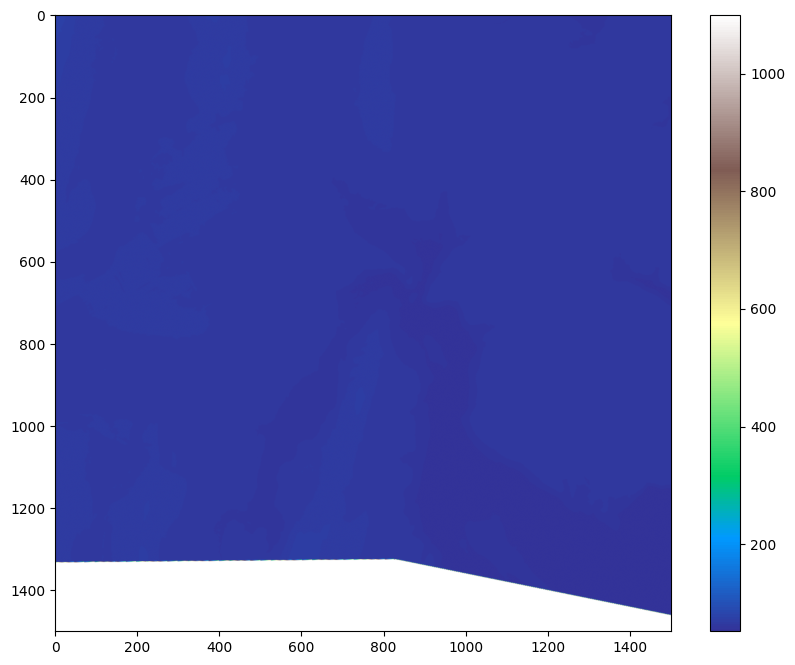

In [15]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------
# Load TIFF (edit path)
# -------------------------------------
arr = tifffile.imread("./data/tiffs/10078660_15.tiff")

dem = arr[:, :, 3].astype("float32")   # Band 4  (DEM)
hs  = arr[:, :, 6].astype("float32")   # Band 7  (Hillshade)
print("DEM dtype:", dem.dtype)
print("DEM min:", np.nanmin(dem))
print("DEM max:", np.nanmax(dem))
print("DEM unique values:", np.unique(dem[:1000]).size)
# -------------------------------------
# Normalize data
# -------------------------------------
dem_norm = (dem - np.nanmin(dem)) / (np.nanmax(dem) - np.nanmin(dem))
hs_norm  = (hs  - np.nanmin(hs))  / (np.nanmax(hs)  - np.nanmin(hs))

# -------------------------------------
# Color from DEM + lighting from hillshade
# -------------------------------------


# -------------------------------------
# Plot
# -------------------------------------
plt.figure(figsize=(10, 8))


plt.imshow(dem, cmap="terrain")
plt.colorbar()
plt.show()